In [1]:
import pandas as pd
import numpy as np
import requests as req 
import json
import seaborn as sns
import matplotlib.pyplot as plt
from citipy import citipy
from config import API_KEY
import time 
import random
%matplotlib inline

In [2]:
#Generating random list for latitudes and longitudes
latitude = []
longitude = []

for lat in np.random.randint(-90,90,1000):
    latitude.append(lat)

for long in np.random.randint(-180,180,800):
    longitude.append(long)

In [3]:
latlong = tuple(zip(latitude,longitude))

In [4]:
#Locating nearest city
cities = []
country = []

for lat,long in latlong:
    city = citipy.nearest_city(lat,long)
    cityname = city.city_name
    cities.append(cityname)
    country.append(city.country_code)

In [5]:
#Different cities generated
print(len(set(cities)))

371


In [6]:
#Store all the cities & countries generated with citipy
df_countries = pd.DataFrame({'Cities': cities,
              'Country': country})

#Storing additional column to information from openweathermap api
df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,illoqqortoormiut,gl,,,,,,
1,umm kaddadah,sd,,,,,,
2,avarua,ck,,,,,,
3,lasa,cn,,,,,,
4,punta arenas,cl,,,,,,


In [8]:
#Fill in values for blank columns in dataframe and looping through all rows

for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    #url = "http://api.openweathermap.org/data/2.5/forecast/daily?id=524901&lang=zh_cn"
    
    #api call for all Cities 
    url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,API_KEY)
    
    country_info = req.get(url).json()
    
    #print all api url's for each city
    print(url)
    
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=umm kaddadah,sd&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=lasa,cn&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/forecast?q=luderitz,na&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=amderma,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=robertsport,lr&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=clyde river,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tuatapere,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bolungarvik,is&units=IMPER

http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=agva,tr&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=haines junction,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kavaratti,in&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=toliary,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=airai,pw&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weath

http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bongandanga,cd&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=acapulco,mx&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ancud,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=carnarvon,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tuktoyaktuk,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6ab

http://api.openweathermap.org/data/2.5/forecast?q=keti bandar,pk&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hilo,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=east london,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=anar darreh,af&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=vao,nc&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=bluff,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=js

http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=luderitz,na&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ahipara,nz&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hermanus,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=barillas,gt&units=IMPERIAL&mo

http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=georgetown,sh&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=namibe,ao&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=eureka,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=zaria,ng&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=east london,za&units=IMPERIAL&mode=

http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tivaouane,sn&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=erenhot,cn&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hambantota,lk&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=sitka,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=taolanaro,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=illoqqortoormiut,gl&units=IMPERIAL&m

http://api.openweathermap.org/data/2.5/forecast?q=castro,cl&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=esperance,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=patan,in&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=provideniya,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=isangel,vu&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=nelson bay,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=vieste,it&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=mataura,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb655

http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=metro,id&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=don sak,th&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hobart,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=brigantine,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=formosa do rio preto,br&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=ushuaia,ar&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c

http://api.openweathermap.org/data/2.5/forecast?q=caravelas,br&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=new norfolk,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=moramanga,mg&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=pacific grove,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=khatanga,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=rikitea,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=avarua,ck&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=upernavik,gl&units=IMPERIAL&mode=json&APPID=94e61178e945180a2

http://api.openweathermap.org/data/2.5/forecast?q=nantucket,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=boali,cf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=fort atkinson,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=winslow,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=hambantota,lk&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=tiksi,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=busselton,au&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=kapaa,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6

http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=port elizabeth,za&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=barrow,us&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=prince rupert,ca&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=pevek,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=atuona,pf&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6abaeb6554ca2
http://api.openweathermap.org/data/2.5/forecast?q=pevek,ru&units=IMPERIAL&mode=json&APPID=94e61178e945180a21c6a

In [10]:
#changing data recieved from openweathermap api to numerical data
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,illoqqortoormiut,gl,NaN,NaN,NaN,NaN,NaN,NaN
1,umm kaddadah,sd,13.6017,26.6876,56.88,22.0,0.0,5.19
2,avarua,ck,-21.2078,-159.7750,82.44,100.0,76.0,8.77
3,lasa,cn,NaN,NaN,NaN,NaN,NaN,NaN
4,punta arenas,cl,-53.1627,-70.9081,46.11,94.0,8.0,21.18
5,chokurdakh,ru,70.6192,147.9022,-24.67,75.0,32.0,9.33
6,rikitea,pf,-23.1203,-134.9692,80.19,100.0,20.0,7.76
7,darnah,ly,32.7670,22.6367,62.19,100.0,0.0,18.28
8,zhanaozen,kz,43.3496,52.8545,18.81,83.0,0.0,7.99
9,mehamn,no,71.0350,27.8517,17.73,82.0,32.0,6.98


In [13]:
len_orig = len(df_countries)
len_dropna = len(df_countries.dropna())
missing_weather = len_orig - len_dropna

In [14]:
print(missing_weather)
print('\n')
print(len(df_countries.dropna()))

114


686


In [15]:
#save citipy data into CSV file and read
df_countries = df_countries.dropna()
df_countries.to_csv(path_or_buf='df_countries.csv', encoding="utf-8", index=False)
df_countries = pd.read_csv("df_countries.csv")
df_countries

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,umm kaddadah,sd,13.6017,26.6876,56.88,22.0,0.0,5.19
1,avarua,ck,-21.2078,-159.7750,82.44,100.0,76.0,8.77
2,punta arenas,cl,-53.1627,-70.9081,46.11,94.0,8.0,21.18
3,chokurdakh,ru,70.6192,147.9022,-24.67,75.0,32.0,9.33
4,rikitea,pf,-23.1203,-134.9692,80.19,100.0,20.0,7.76
5,darnah,ly,32.7670,22.6367,62.19,100.0,0.0,18.28
6,zhanaozen,kz,43.3496,52.8545,18.81,83.0,0.0,7.99
7,mehamn,no,71.0350,27.8517,17.73,82.0,32.0,6.98
8,cangzhou,cn,38.3043,116.8512,58.77,81.0,0.0,11.34
9,albany,au,-35.0248,117.8836,68.49,85.0,92.0,6.31


TEMPERATURE(F) Vs. LATITUDE

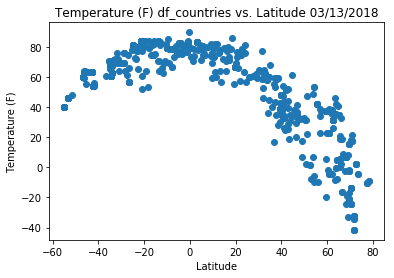

In [16]:
# Scatter Plot for Temperature (F) vs. Latitude

date = time.strftime("%m/%d/%Y")
# print(date)
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'])
plt.title(f"Temperature (F) df_countries vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
plt.savefig("Temperature (F).png")
plt.show()

HUMIDITY(%) Vs. LATITUDE

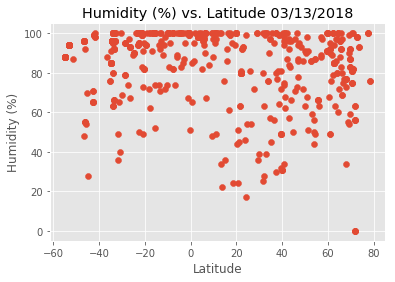

In [17]:
# Scatter Plot for Humidity (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Humidity (%)'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity (%).png")
plt.show()

In [ ]:
CLOUDINESS(%) Vs. LATITUDE

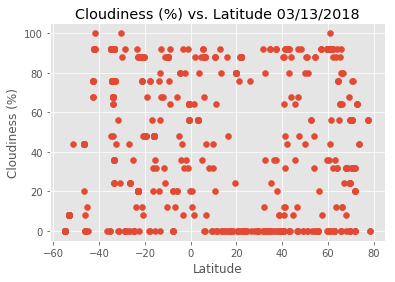

In [18]:
#Scatter Plot for Cloudiness (%) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Cloudiness (%)'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness (%).png")
plt.show()

WIND SPEED(mph) vs. LATITUDE

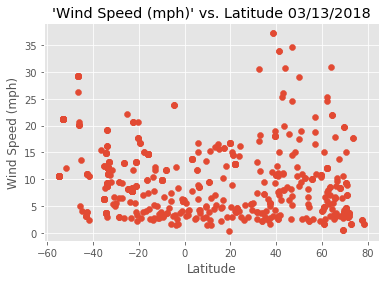

In [19]:
# Scatter Plot for Wind Speed (mph) vs. Latitude

plt.scatter(df_countries['Latitude'], df_countries['Wind Speed (mph)'])
plt.title(f"'Wind Speed (mph)' vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.style.use('ggplot')
plt.savefig('Wind Speed (mph).png')
plt.show()

In [20]:
#Average wind speed
print(df_countries['Wind Speed (mph)'].mean())

10.221428571428588


OBSERVATIONS

. The wind speeds is higher on average on the south pole and north pole

. Temperature vs. Latitude: the scatter plot shows that the temperature increase as the latitude increases

. Cloudiness vs. Latitude: shows that the wind is every where but clogged below equator at zero level.